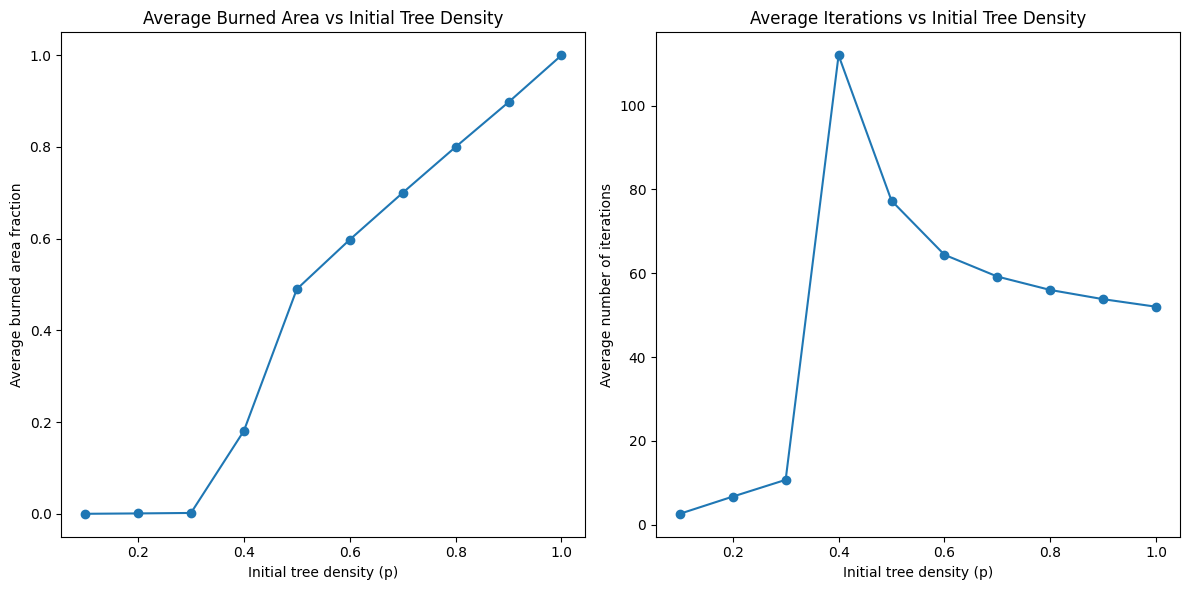

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_forest(n, p):
    """Initialize the forest with trees distributed with probability p"""
    forest = np.zeros((n, n), dtype=int)
    for i in range(n):
        for j in range(n):
            if np.random.rand() < p:
                forest[i, j] = 1
    # Set one random tree on fire
    burning_trees = np.argwhere(forest == 1)
    if len(burning_trees) > 0:
        i, j = burning_trees[np.random.choice(len(burning_trees))]
        forest[i, j] = 2
    return forest

def update_forest(forest):
    """Update the forest by spreading the fire"""
    new_forest = forest.copy()
    n = forest.shape[0]
    for i in range(n):
        for j in range(n):
            if forest[i, j] == 2:  # If the tree is burning
                # Burn the neighbors
                for di in [-1, 0, 1]:
                    for dj in [-1, 0, 1]:
                        ni, nj = (i + di) % n, (j + dj) % n  # Periodic boundary conditions
                        if forest[ni, nj] == 1:
                            new_forest[ni, nj] = 2
                # The tree becomes burnt
                new_forest[i, j] = 3
    return new_forest

def simulate_forest_fire(n, p):
    """Simulate the forest fire until it stops spreading"""
    forest = initialize_forest(n, p)
    iterations = 0
    while True:
        new_forest = update_forest(forest)
        iterations += 1
        if np.array_equal(new_forest, forest):
            break
        forest = new_forest
    burned_area = np.sum(forest == 3) / (n * n)
    return burned_area, iterations

def main():
    n = 100  # Grid size
    p_values = np.linspace(0.1, 1.0, 10)  # Different probabilities of initial tree density
    M = 10  # Number of simulations for each p

    avg_burned_areas = []
    avg_iterations = []

    for p in p_values:
        burned_areas = []
        iterations_list = []
        for _ in range(M):
            burned_area, iterations = simulate_forest_fire(n, p)
            burned_areas.append(burned_area)
            iterations_list.append(iterations)
        avg_burned_areas.append(np.mean(burned_areas))
        avg_iterations.append(np.mean(iterations_list))

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(p_values, avg_burned_areas, 'o-')
    plt.xlabel('Initial tree density (p)')
    plt.ylabel('Average burned area fraction')
    plt.title('Average Burned Area vs Initial Tree Density')

    plt.subplot(1, 2, 2)
    plt.plot(p_values, avg_iterations, 'o-')
    plt.xlabel('Initial tree density (p)')
    plt.ylabel('Average number of iterations')
    plt.title('Average Iterations vs Initial Tree Density')

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()